In [1]:
import numpy as np
import cv2
import pandas as pd

In [3]:
img = cv2.imread('Sandstone_Versa0180_image.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

In [4]:
df

,Original Image
0,0
1,0
2,0
3,0
4,0
...,...
1019899,0
1019900,0
1019901,0
1019902,0


In [5]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [6]:
#Now, add a column in the data frame for the Labels
#For this, we need to import the labeled image
labeled_img = cv2.imread('Sandstone_Versa0180_mask.png')
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0               0       0       0       0       0       0       0       0   
1               0       0       0       0       0       0       0       0   
2               0       0       0       0       0       0       0       0   
3               0       0       0       0       0       0       0       0   
4               0       0       0       0       0       0       0       0   

   Gabor8  Gabor9  ...  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  Gabor29  \
0       0       0  ...        0        0        0        0        0        0   
1       0       0  ...        0        0        0        0        0        0   
2       0       0  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   Gabor30  Gabor31  Gabor32  Labels  
0        0       

In [7]:
print(df.Labels.unique())  #Look at the labels in our dataframe
print(df['Labels'].value_counts())

[ 33 201 231  65]
33     491532
231    439024
201     72927
65      16421
Name: Labels, dtype: int64


In [9]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 


X = X.iloc[:, :].to_numpy() #Convert X from pandas dataframe to Numpy array



#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [11]:
X.shape

(1019904, 33)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_shape=(33,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
	# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 272       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
from keras.utils import normalize, to_categorical
from sklearn.preprocessing import LabelEncoder

X_train_deep = normalize(X_train, axis=1)
X_test_deep = normalize(X_test, axis=1)

#Encode Y labels to 0, 1, 2, 3, then one hot encode. 
le = LabelEncoder()
le.fit(y_train)
y_train_deep = le.transform(y_train)
y_train_deep_cat = to_categorical(y_train_deep)

y_test_deep = le.transform(y_test)
y_test_deep_cat = to_categorical(y_test_deep)

In [23]:
X_train_deep.shape

(611942, 33)

In [37]:
#Automatically define class weights
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train_deep), y= y_train_deep)
weight = {i : class_weights[i] for i in range(4)}

In [39]:
class_weights


array([ 0.51881299, 15.49691045,  3.49258042,  0.5808304 ])

In [40]:
weight

{0: 0.5188129925799319,
 1: 15.496910453808752,
 2: 3.4925804168664247,
 3: 0.580830400431298}

In [19]:
values, counts = np.unique(y_train_deep, return_counts=True)
print(values, counts)

class_weights_manual = {0: 0.1,
                1: 1.6,
                2: 0.108,
                3: 0.015}

[0 1 2 3] [294876   9872  43803 263391]


In [20]:
history = model.fit(X_train_deep, y_train_deep_cat, epochs=10, 
                    class_weight=class_weights_manual, validation_data = (X_test_deep, y_test_deep_cat))

Epoch 1/10
19124/19124 [==============================] - 19s 953us/step - loss: 0.0136 - accuracy: 0.8796 - val_loss: 0.2442 - val_accuracy: 0.9103
Epoch 2/10
19124/19124 [==============================] - 18s 964us/step - loss: 0.0106 - accuracy: 0.9102 - val_loss: 0.2472 - val_accuracy: 0.9097
Epoch 3/10
19124/19124 [==============================] - 18s 955us/step - loss: 0.0106 - accuracy: 0.9098 - val_loss: 0.2877 - val_accuracy: 0.8798
Epoch 4/10
19124/19124 [==============================] - 19s 993us/step - loss: 0.0105 - accuracy: 0.9105 - val_loss: 0.2963 - val_accuracy: 0.8827
Epoch 5/10
19124/19124 [==============================] - 19s 971us/step - loss: 0.0105 - accuracy: 0.9112 - val_loss: 0.2473 - val_accuracy: 0.9063
Epoch 6/10
19124/19124 [==============================] - 19s 972us/step - loss: 0.0105 - accuracy: 0.9109 - val_loss: 0.2208 - val_accuracy: 0.9181
Epoch 7/10
19124/19124 [==============================] - 18s 948us/step - loss: 0.0104 - accuracy: 0.9120

In [41]:
history2 = model.fit(X_train_deep, y_train_deep_cat, epochs=10, 
                    class_weight=weight, validation_data = (X_test_deep, y_test_deep_cat))

Epoch 1/10
19124/19124 [==============================] - 19s 964us/step - loss: 0.2135 - accuracy: 0.9231 - val_loss: 0.2038 - val_accuracy: 0.9253
Epoch 2/10
19124/19124 [==============================] - 18s 946us/step - loss: 0.2128 - accuracy: 0.9229 - val_loss: 0.2369 - val_accuracy: 0.9122
Epoch 3/10
19124/19124 [==============================] - 18s 939us/step - loss: 0.2115 - accuracy: 0.9232 - val_loss: 0.2282 - val_accuracy: 0.9149
Epoch 4/10
19124/19124 [==============================] - 18s 943us/step - loss: 0.2112 - accuracy: 0.9232 - val_loss: 0.2041 - val_accuracy: 0.9269
Epoch 5/10
19124/19124 [==============================] - 18s 934us/step - loss: 0.2104 - accuracy: 0.9238 - val_loss: 0.2428 - val_accuracy: 0.9109
Epoch 6/10
19124/19124 [==============================] - 18s 933us/step - loss: 0.2101 - accuracy: 0.9239 - val_loss: 0.1932 - val_accuracy: 0.9305
Epoch 7/10
19124/19124 [==============================] - 18s 934us/step - loss: 0.2096 - accuracy: 0.9241

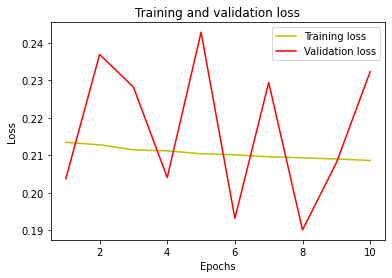

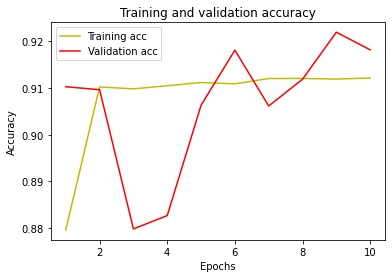

In [43]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
prediction_deep = model.predict(X_test_deep)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_deep, y_test_deep_cat, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

mythreshold=0.5
y_pred_thresh = (prediction_deep >= mythreshold).astype(int)

y_pred_thresholded=np.argmax(y_pred_thresh, axis=-1)

#y_pred_thresholded = y_pred_thresholded.argmax(1)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test_deep, y_pred_thresholded)  
print(cm)

12749/12749 [==============================] - 6s 460us/step
Accuracy: 91.73
[[187639      7   8937     73]
 [     2   6490      4     53]
 [   756     21  23461   4886]
 [   417  11361   7491 156364]]


In [45]:
print("Pixel 33 accuracy = ", cm[0,0] / (cm[0,0]+cm[1,0]+cm[2,0]+cm[3,0]))
print("Pixel 65 accuracy = ",   cm[1,1] / (cm[0,1]+cm[1,1]+cm[2,1]+cm[3,1]))
print("Pixel 201 accuracy = ",   cm[2,2] / (cm[0,2]+cm[1,2]+cm[2,2]+cm[3,2]))
print("Pixel 231 accuracy = ",   cm[3,3] / (cm[0,3]+cm[1,3]+cm[2,3]+cm[3,3]))

Pixel 33 accuracy =  0.9937769445062337
Pixel 65 accuracy =  0.36299569327143577
Pixel 201 accuracy =  0.5880981625849147
Pixel 231 accuracy =  0.9689420979575649
